In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap

from sklearn.manifold import TSNE
import json

In [2]:
df = pd.read_csv("COGVIC_germline_variants_embeddings.csv")
embeddings = df.iloc[:,3:].values
df

,dbSNP,Gene,disease,z0,z1,z2,z3,z4,z5,z6,...,z758,z759,z760,z761,z762,z763,z764,z765,z766,z767
0,rs373407950(chr9-21974705-GtoT),CDKN2A,Hereditary_cancer-predisposing_syndrome\nHered...,-0.539691,-0.174543,1.044084,0.256478,0.231284,-0.702768,-0.872518,...,0.542805,-2.409801,-0.743520,-0.738455,-0.291914,1.252143,0.699226,-0.759344,0.607886,1.075293
1,rs1374339026(chr9-135772897-AtoG),TSC1,.,-0.540672,0.543235,-0.490716,0.328566,0.339403,-0.700466,-0.288621,...,1.346260,-2.077731,-0.298208,0.223550,-0.451769,-0.625153,-0.179322,-0.258907,0.376866,1.259697
2,rs779313090(chr5-86564637-GtoC),RASA1,.,-0.626442,0.871458,0.366182,-0.760628,-0.133029,-0.682434,-0.319379,...,0.107243,-1.190907,-0.673001,0.438872,-0.340663,-0.261039,0.085255,0.664551,1.790758,0.125847
3,rs753500118(chr5-149459663-CtoA),CSF1R,.,-0.729752,1.005040,0.583122,-0.513501,-0.339888,-2.678360,-1.365140,...,0.507231,0.481188,-0.833195,-0.769553,0.256484,-1.272810,1.237802,-0.406428,0.193786,0.494198
4,rs1310116062(chr3-49398430-TtoC),RHOA,.,-0.684175,0.049300,-0.028795,0.131858,1.153759,-1.973937,-0.679931,...,0.034075,-1.192609,-0.655782,-1.296616,-0.309189,0.620820,-0.129812,-0.665559,-0.163071,1.149769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,rs121917784(chr9-98011537-GtoA),FANCC,"Fanconi_anemia\nFanconi_anemia,_complementatio...",-1.255838,0.216209,0.398739,-0.510883,1.165082,-1.190826,1.292827,...,0.821031,-1.398857,-0.281081,-1.758270,-0.148691,0.858567,1.503602,0.407100,1.444615,1.527008
419,rs780378700(chr9-98244421-CtoT),PTCH1,.,0.888525,0.366815,-0.597664,-1.585864,-0.037920,-1.249760,-0.406643,...,1.784532,-1.396804,0.879045,-0.331404,-1.112054,1.708760,1.155327,0.621366,1.276303,0.409931
420,rs755103500(chr9-98279102-TtoC),PTCH1,.,0.399357,-0.450573,1.533303,0.741039,-1.890769,-1.421385,-0.395862,...,1.134456,-0.871581,-0.006321,1.254513,-0.018350,0.233841,-0.269248,-0.683965,-0.583597,0.078611
421,rs146700772(chrX-153997508-AtoC),DKC1,Dyskeratosis_congenita\nDyskeratosis_congenita...,-1.251032,-0.131579,0.244597,-0.336704,-1.635358,-1.893006,-0.300172,...,1.126615,-1.852119,0.251305,0.418952,-0.383519,0.678718,0.745059,0.497998,0.579320,-0.158973


## Breast cancer pathway

The set of breast cancer genes was downloaded from the GSEA database (https://www.gsea-msigdb.org/gsea/msigdb/cards/WP_BREAST_CANCER_PATHWAY.html)

In [4]:
with open("data/WP_BREAST_CANCER_PATHWAY.v2022.1.Hs.json", "r") as f:
    breast_cancer_pathway = json.load(f)
breast_cancer_genes = breast_cancer_pathway['WP_BREAST_CANCER_PATHWAY']["geneSymbols"]



In [5]:
reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=4, min_dist=0.17)
visualization_embeddings = reducer.fit_transform(embeddings)

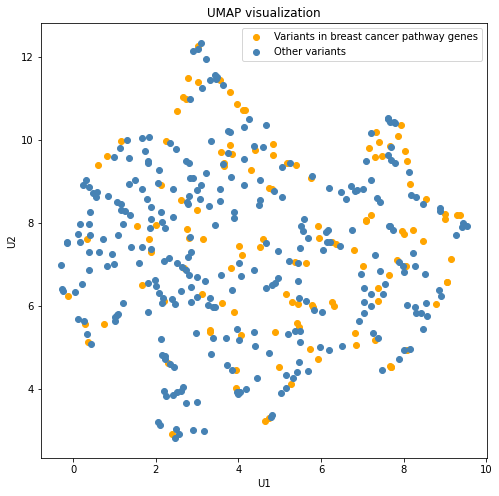

In [7]:


fig, ax = plt.subplots(figsize=(8,8))

ix = [i for i, gn in df["Gene"].items() if gn in breast_cancer_genes]
neg_ix = [i for i in range(len(df)) if i not in ix]


ax.scatter(visualization_embeddings[ix,0], visualization_embeddings[ix,1], c="orange", label="Variants in breast cancer pathway genes")
ax.scatter(visualization_embeddings[neg_ix,0], visualization_embeddings[neg_ix,1], c="steelblue", label="Other variants")


ax.set_xlabel("U1")
ax.set_ylabel("U2")
ax.set_title("UMAP visualization")

ax.legend()
fig.savefig("images/COGVIC_UMAP_embeddings.png", facecolor="white")
plt.show()